<a href="https://colab.research.google.com/github/wtassinari/COVID19/blob/master/Aula_19_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória com Python


In [2]:
# Importando os pacotes do python
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets


In [ ]:
# Fazendo o upload dos arquivos csv via click point
# from google.colab import files
# uploaded = files.upload()


In [3]:
# Uma outra forma é montando o google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
vendas_df = pd.read_csv(r"/content/drive/MyDrive/Aprendendo/Python Hasteg/Aula 19 - Análise da Dados com o Pandas + Integração Python e Excel/Contoso - Vendas - 2017.csv", sep=";" , encoding="utf-8")
vendas_df.head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1


In [5]:
produtos_df = pd.read_csv(r"/content/drive/MyDrive/Aprendendo/Python Hasteg/Aula 19 - Análise da Dados com o Pandas + Integração Python e Excel/Contoso - Cadastro Produtos.csv", sep=";", encoding="utf-8")
produtos_df.head()

,Nome do Produto,Descricao do Produto,Fabricante,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,ID Subcategoria
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Econômico,"10,69","20,96",873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,880,22
3,Contoso Optical Wheel OEM PS/2 Mouse E60 White,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,881,22
4,Contoso Optical Wheel OEM PS/2 Mouse E60 Silver,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Econômico,"6,63",13,882,22


In [6]:
lojas_df = pd.read_csv(r"/content/drive/MyDrive/Aprendendo/Python Hasteg/Aula 19 - Análise da Dados com o Pandas + Integração Python e Excel/Contoso - Lojas.csv", sep=";", encoding="utf-8")
lojas_df.head()

,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos


In [7]:
clientes_df = pd.read_csv(r"/content/drive/MyDrive/Aprendendo/Python Hasteg/Aula 19 - Análise da Dados com o Pandas + Integração Python e Excel/Contoso - Clientes.csv", sep=";", encoding="utf-8")
clientes_df.head()

,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN


In [8]:
# Selecionando as colunas de interesse
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]


In [9]:
## Mesclando ou juntando os dataframes - merge
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente')


In [10]:
# Renomeando nome da coluna
vendas_df= vendas_df.rename(columns={'E-mail': 'E-mail do cliente'})

In [11]:
# O panda utiliza o matplotlib como biblioteca para construção dos graficos

# Qual cliente que comprou mais vezes
frequencia_clientes = vendas_df['E-mail do cliente'].value_counts()
frequencia_clientes 

karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail do cliente, Length: 38907, dtype: int64

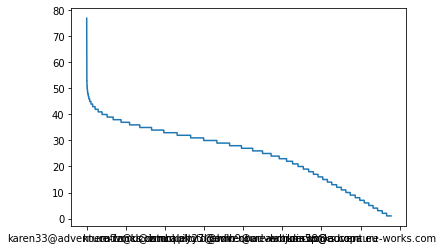

In [12]:
# Fazendo via gráfico 
frequencia_clientes.plot()
# plt.show()

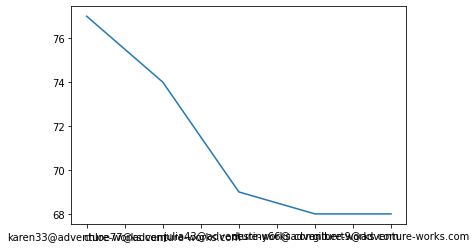

In [13]:
# apenas dos 5 clientes mais frequentes
frequencia_clientes[:5].plot()
# plt.show()

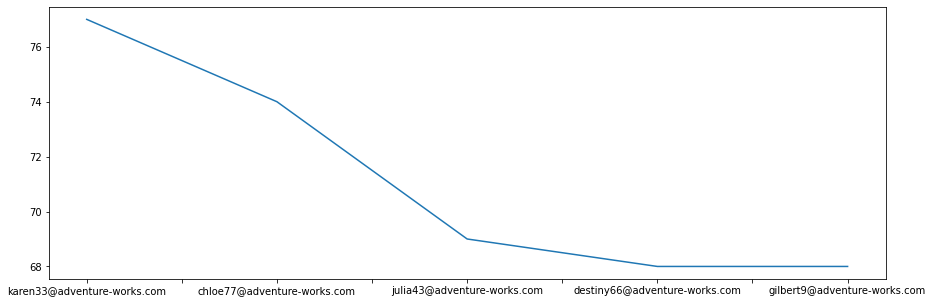

In [14]:
# Formatando o gráfico
frequencia_clientes[:5].plot(figsize=(15,5))
plt.show()

In [15]:
# Qual a loja que mais vendeu ?

# Fazendo um groupby
vendas_lojas = vendas_df.groupby('Nome da Loja').sum()

# Filtrando 
vendas_lojas = vendas_lojas[['Quantidade Vendida']]
vendas_lojas.head()

# display(vendas_lojas)

,Quantidade Vendida
Nome da Loja,
Loja Contoso Albany,26353
Loja Contoso Alexandria,26247
Loja Contoso Amsterdam,28294
Loja Contoso Anchorage,27451
Loja Contoso Annapolis,26065


In [16]:
# Ordenando o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida')
vendas_lojas


,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234
Loja Contoso Racine No.2,253
Loja Contoso Marseille,370
Loja Contoso Paterson,371
Loja Contoso Berlin,379
...,...
Loja Contoso North America Reseller,520176
Loja Contoso Asia Online,578458
Loja Contoso Europe Online,616845


In [17]:
# Ordenando de forma decrescente o dataframe
vendas_lojas = vendas_lojas.sort_values('Quantidade Vendida', ascending=False)
vendas_lojas


,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


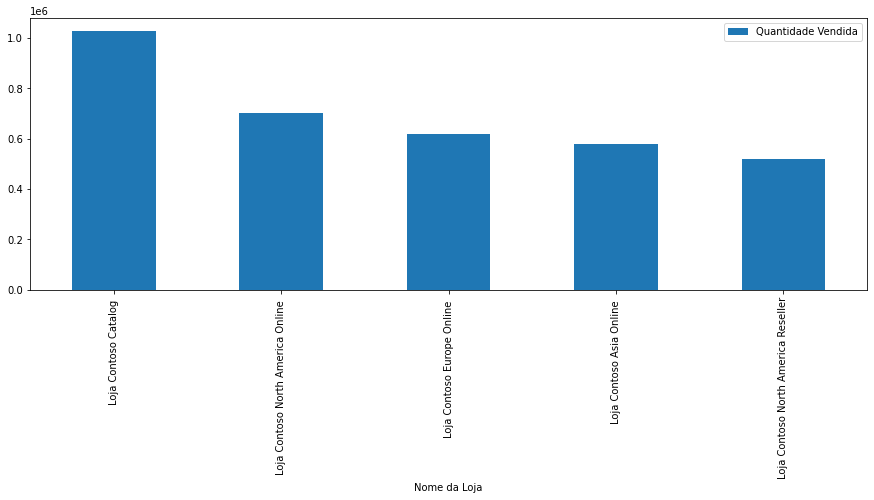

In [18]:
# Plotando no gráfico
vendas_lojas[:5].plot(figsize=(15,5), kind = 'bar')
plt.show()

In [19]:
# Printando apenas o valor
maior_valor = vendas_lojas['Quantidade Vendida'].max()
melhor_loja = vendas_lojas['Quantidade Vendida'].idxmax()
print(melhor_loja, maior_valor)


Loja Contoso Catalog  1029117


In [20]:
# Loja que menos vendeu
vendas_lojas[-1:]

,Quantidade Vendida
Nome da Loja,
Loja Contoso Venezia,234


In [21]:
#### Produto que menos vendeu

# Fazendo um group by do produto
produtos = vendas_df.groupby('Nome do Produto').sum()
# Filtrando 
produtos = produtos[['Quantidade Vendida']]
produtos.head()

,Quantidade Vendida
Nome do Produto,
A. Datum Advanced Digital Camera M300 Azure,8999
A. Datum Advanced Digital Camera M300 Black,12087
A. Datum Advanced Digital Camera M300 Green,11400
A. Datum Advanced Digital Camera M300 Grey,10713
A. Datum Advanced Digital Camera M300 Orange,12181


In [22]:
# Ordenando o dataframe
produtos = produtos.sort_values('Quantidade Vendida')
produtos

,Quantidade Vendida
Nome do Produto,
SV 16xDVD E340 Silver,86
Contoso 4GB Portable MP3 Player M450 White,94
Contoso 4GB Portable MP3 Player M450 Yellow,110
SV 16xDVD E340 Black,124
Contoso 4GB Portable MP3 Player M450 Black,136
...,...
Contoso Rubberized Skin BlackBerry E100 Silver,113060
Contoso In-Line Coupler E180 Silver,113400
Contoso Rubberized Skin BlackBerry E100 White,113440


In [23]:
quant_produto_menos_vendido = produtos['Quantidade Vendida'].min()
produto_menos_vendido = produtos['Quantidade Vendida'].idxmin()
print(produto_menos_vendido, quant_produto_menos_vendido)

SV 16xDVD E340 Silver 86


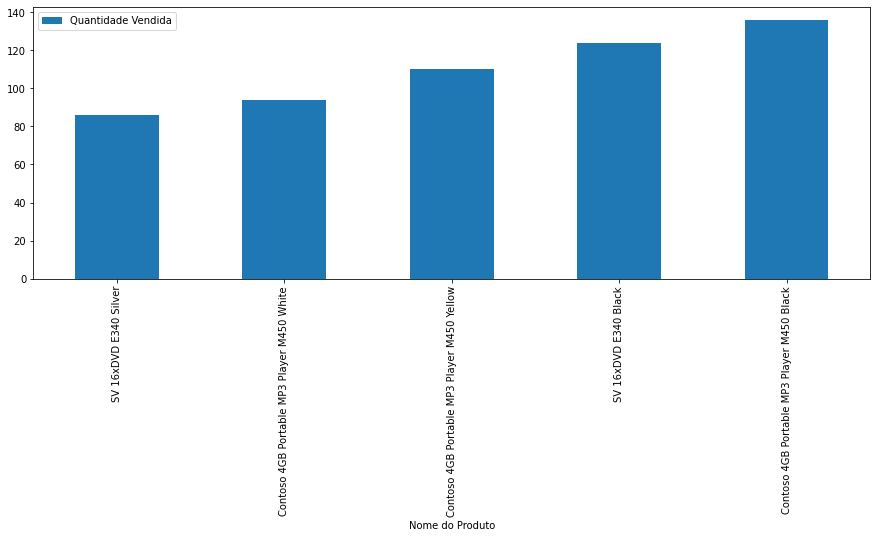

In [24]:
# Plotando no gráfico
produtos[:5].plot(figsize=(15,5), kind = 'bar')
plt.show()

In [26]:
################ Pandas 07 ##############
# Filtrando o dataframe

# Qual é p percentual de vendas devolvidas

qtde_vendida = vendas_df['Quantidade Vendida'].sum()
display(qtde_vendida)

qtde_devolvida = vendas_df['Quantidade Devolvida'].sum()
display(qtde_devolvida)

print('{:.2%}'.format(qtde_devolvida/qtde_vendida))

11851928

138931

1.17%


In [27]:
# Qual é o percentual de vendas devolvidas em uma loja

# Fazer um dataframe com filtro aparecendo as vendas de apenas uma loja

vendas_lojacontosoeupeonline = vendas_df[vendas_df['ID Loja'] == 306]
display(vendas_lojacontosoeupeonline)

qtde_vendida = vendas_lojacontosoeupeonline['Quantidade Vendida'].sum()
display(qtde_vendida)

qtde_devolvida = vendas_lojacontosoeupeonline['Quantidade Devolvida'].sum()
display(qtde_devolvida)

print('{:.2%}'.format(qtde_devolvida/qtde_vendida))

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


616845

8174

1.33%


In [28]:
# Fazendo em duas partes o que está acontecendo, faz a mesma coisa que o item anterior

# vendas_lojacontosoeupeonline = vendas_df[vendas_df['ID Loja'] == 306]
loja306 = vendas_df['ID Loja'] == 306
display(loja306)

vendas_lojacontosoeupeonline = vendas_df[loja306]
display(vendas_lojacontosoeupeonline)


0         False
1          True
2         False
3         False
4         False
          ...  
980637    False
980638    False
980639    False
980640    False
980641    False
Name: ID Loja, Length: 980642, dtype: bool

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


In [29]:
df_loja306semdev = vendas_df[(vendas_df['ID Loja'] == 306) & (vendas_df['Quantidade Devolvida'] == 0)]
df_loja306semdev

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


In [30]:
# uma outra forma de fazer com as comparações isoladas
loja306 = vendas_df['ID Loja'] == 306
qtde_devolvida_0 = vendas_df['Quantidade Devolvida'] == 0
df2_loja306semdev = vendas_df[loja306 & qtde_devolvida_0]
df2_loja306semdev 

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Litware Home Theater System 2.1 Channel E210 B...,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Fabrikam Laptop14.1 M4100 White,Loja Contoso Europe Online,makayla3@adventure-works.com
77,559478,26/07/2017,29/07/2017,3,306,1382,1,24440,5,0,Contoso Single-line phones E10 Grey,Loja Contoso Europe Online,noah55@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885329,865745,18/11/2017,24/11/2017,6,306,823,10,9259,8,0,Contoso Connectivity Starter Kit Smart Buy M68...,Loja Contoso Europe Online,mplaskitt78@marriott.com
885356,907944,04/12/2017,04/12/2017,0,306,208,10,18529,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,eribchesteres@pbs.org
885386,919123,08/12/2017,08/12/2017,0,306,208,10,38811,8,0,Litware Home Theater System 4.1 Channel M410 S...,Loja Contoso Europe Online,jessica47@adventure-works.com
885390,964452,25/12/2017,25/12/2017,0,306,192,10,30633,8,0,Litware Home Theater System 4.1 Channel M410 B...,Loja Contoso Europe Online,terrence23@adventure-works.com


In [31]:
################ Pandas 08 ##############
# Adicionando, modificando e movendo colunas

#  Informações sobre o dataframe
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980642 entries, 0 to 980641
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
 10  Nome do Produto       980642 non-null  object
 11  Nome da Loja          980642 non-null  object
 12  E-mail do cliente     980642 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.7+ MB


In [32]:
# Transformando uma coluna de datas
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format='%d/%m/%Y')
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980642 entries, 0 to 980641
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Numero da Venda       980642 non-null  int64         
 1   Data da Venda         980642 non-null  datetime64[ns]
 2   Data do Envio         980642 non-null  object        
 3   ID Canal              980642 non-null  int64         
 4   ID Loja               980642 non-null  int64         
 5   ID Produto            980642 non-null  int64         
 6   ID Promocao           980642 non-null  int64         
 7   ID Cliente            980642 non-null  int64         
 8   Quantidade Vendida    980642 non-null  int64         
 9   Quantidade Devolvida  980642 non-null  int64         
 10  Nome do Produto       980642 non-null  object        
 11  Nome da Loja          980642 non-null  object        
 12  E-mail do cliente     980642 non-null  object        
dtyp

In [36]:
# Extrair o dia o mes e o ano em variac=veise separadas
vendas_df['Ano da Venda'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mes da Venda'] = vendas_df['Data da Venda'].dt.month
vendas_df['dia da Venda'] = vendas_df['Data da Venda'].dt.day
vendas_df.head()

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do cliente,Ano da Venda,Mes da Venda,dia da Venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017,1,1
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11,23
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp,2017,3,20
3,18610,2017-01-08,10/01/2017,2,200,448,2,6825,48,0,WWI Desktop PC1.80 E1801 Black,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp,2017,1,8
4,287704,2017-04-23,26/04/2017,3,76,280,1,6825,10,0,Contoso Home Theater System 2.1 Channel M1210 ...,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp,2017,4,23
